# Hi, I'm Fatima Waseem 👋

Welcome to my GitHub profile! I'm currently a **Machine Learning Bootcamp Fellow** at [Data Seekho](https://dataseekho.com), where I'm honing my analysis expertise in machine learning, data science, and artificial intelligence. I am driven by a passion for solving real-world challenges through data-driven solutions and am committed to deepening my knowledge and skills in this dynamic field.


---

## 🌟 About Me
- 🎓 **Education**: Bachelor’s in Statistics from University of the Punjab
- 💻 **Skills**: Python, SQL, Machine Learning, Data Visualization, Pandas, NumPy, Scikit-Learn, TensorFlow, Matplotlib, Seaborn, Statistical Analysis, R , IBM SPSS
- 🌱 **Currently Learning**: Python, Data Analytics, and Advanced Data Science techniques
- 🤝 **Looking to collaborate on**: Open-source data science projects and machine learning competitions
- 🔭 **Research Interests**: Data Science, AI Ethics, Predictive Modeling, Generative AI, Analysis
- 📫 **How to reach me**: Email: fatimawaseem584@gmail.com | [LinkedIn Profile: ]

# Project Outline

1. Loading and Exploring the Data

2. Data Preprocessing and Cleaning

3. Exploratory Data Analysis (EDA)

4. Feature Selection

5. Building Machine Learning Models

6. Model Evaluation 

7. Visualizations and Conclusion

# 1. Loading and Exploring the Data

In [3]:
! pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np

# Load dataset (assuming it's stored locally or can use seaborn's sample datasets)
heart_data = pd.read_csv("C://Users//PMLS//Downloads//heart dataset.csv")
print(heart_data.head())
print(heart_data.info())
print(heart_data.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

# 2. Data Preprocessing and Cleaning

To handle missing values, encode categorical features, and normalize the data.

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Check for missing values
print(heart_data.isnull().sum())

# Encode categorical variables if any
# Assuming 'target' is the output and is binary (0 = No Heart Disease, 1 = Heart Disease)
le = LabelEncoder()
heart_data['target'] = le.fit_transform(heart_data['target'])

# Standardize numerical features
scaler = StandardScaler()
num_features = heart_data.drop(columns=['target']).columns
heart_data[num_features] = scaler.fit_transform(heart_data[num_features])

print(heart_data.head())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2 -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3  0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4  0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   

    thalach     exang   oldpeak     slope        ca      thal  target  
0  0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873       1  
1  1.633471 -0.696631  2.122573 -2.274579 -0.714429 -0.512922       1  
2  0.977514 -0.696631  0.310912  0.976352 -0.714429 -0.512922       1  
3  1.239897 -0.696631 -0.206705  0.976352 -0.714429 

The result shows that there is no missing value in the data set.

# 3. Exploratory Data Analysis (EDA)

Visualizations can provide insights into feature distributions and relationships with the target variable.

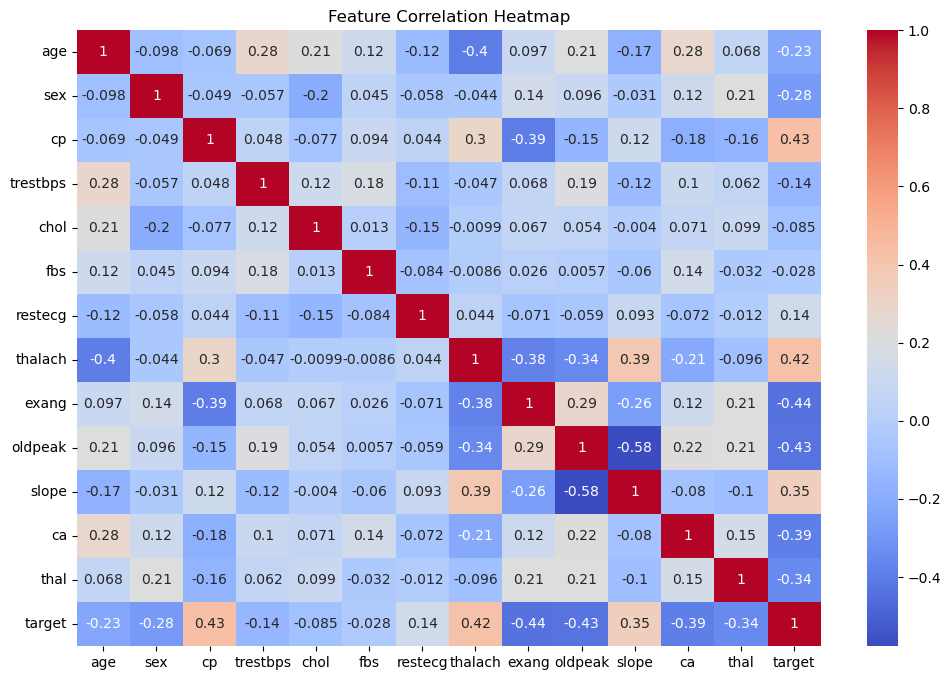

c:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


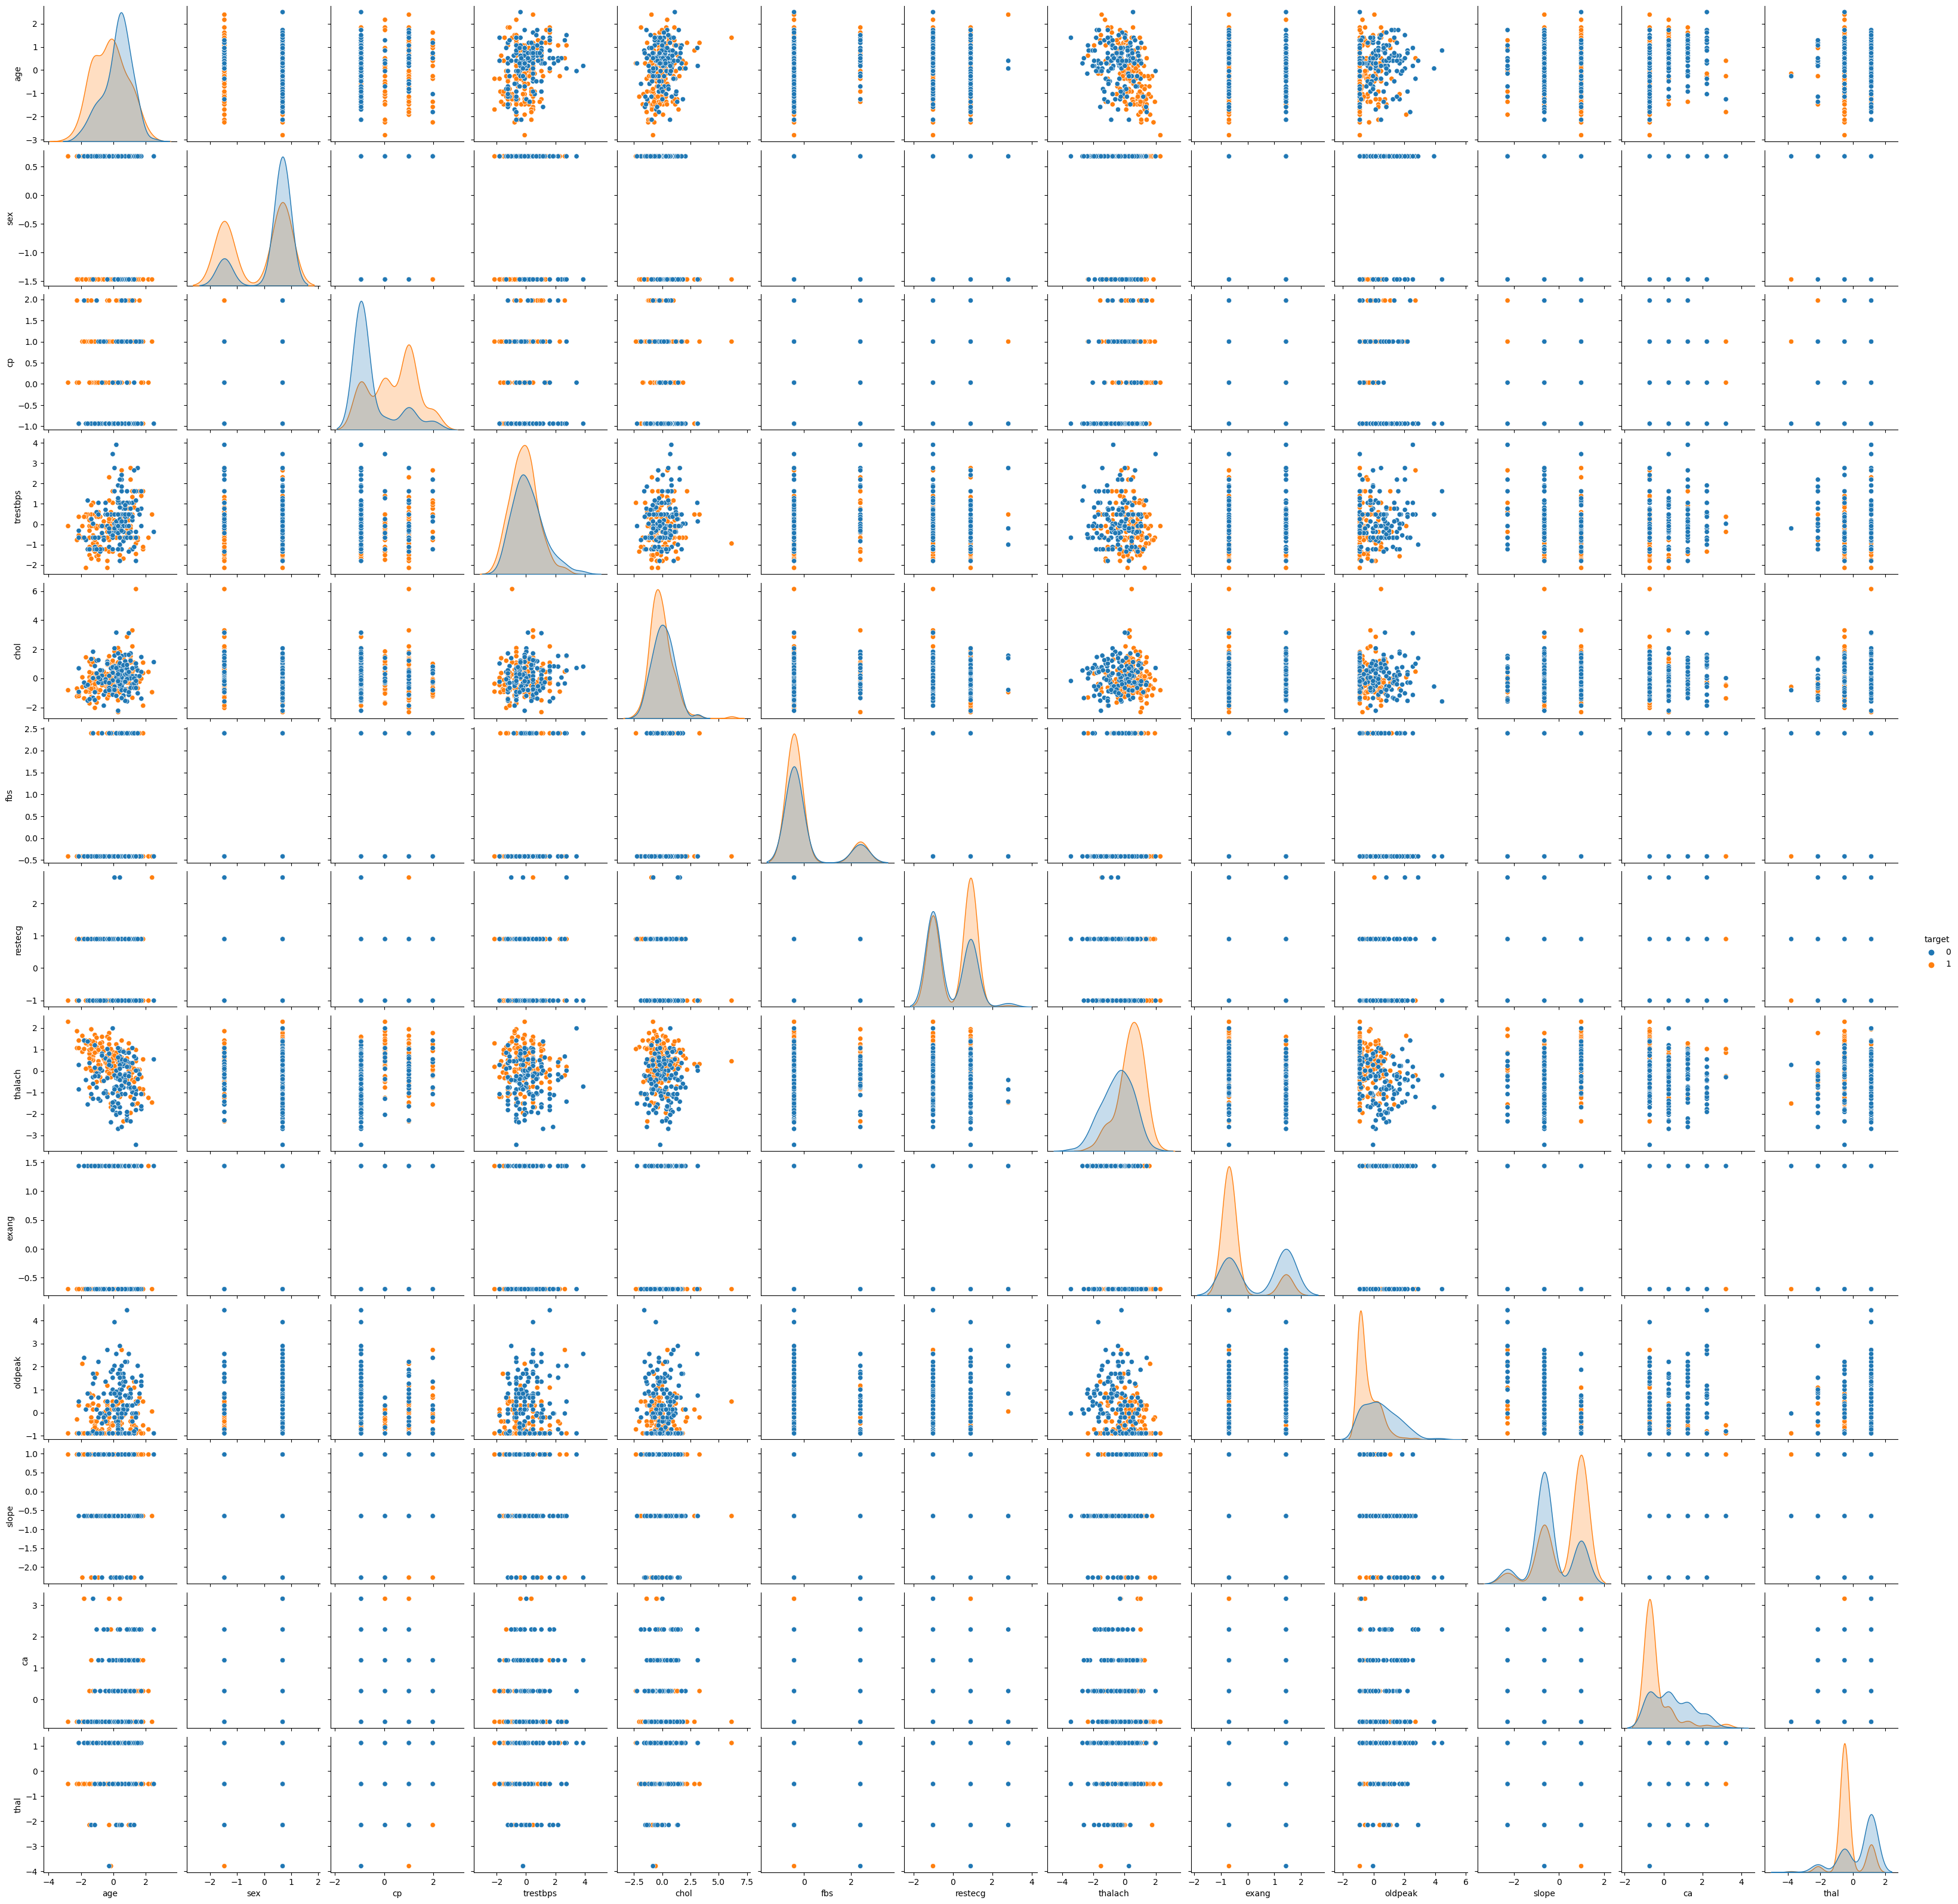

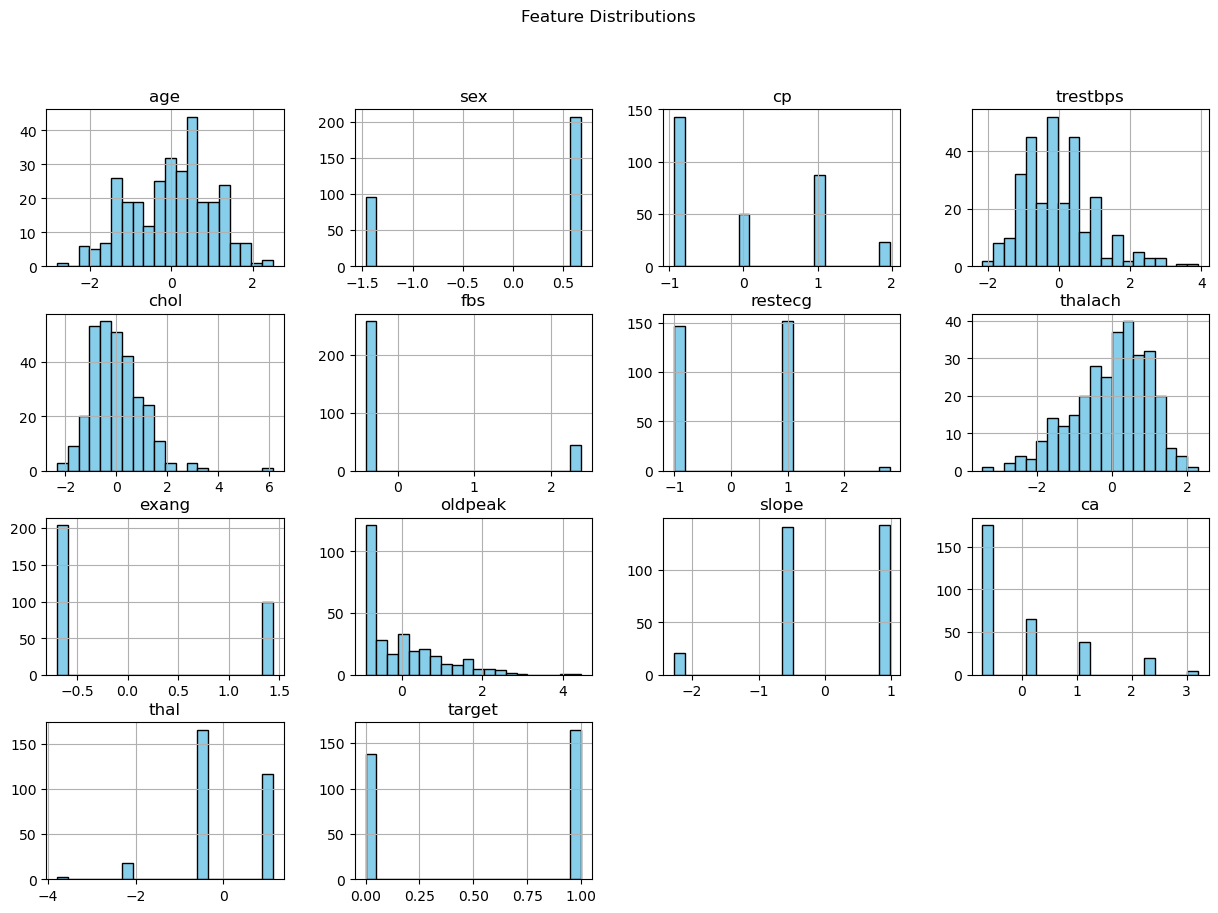

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot for selected features against the target
sns.pairplot(heart_data, hue='target', diag_kind='kde')
plt.show()

# Distribution of each feature
heart_data.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()


From the above maps, features like cp, thalach, exang, oldpeak, slope, and ca appear to have the most significant correlations with the target variable, making them good candidates for feature selection in a predictive model.

# 4. Feature Selection

Feature selection helps us focus on the most predictive features.

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif

# Use f_classif instead of chi2
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)
top_features = X.columns[selector.get_support()]
print("Top Features:", top_features)

X_selected = X[top_features]



Top Features: Index(['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')


These selected features collectively capture a broad range of factors related to heart disease, including demographics (age, sex), symptoms (cp, exang), cardiovascular measurements (trestbps, thalach), stress-related indicators (oldpeak, slope), and clinical test results (ca, thal). Together, they provide a comprehensive profile for predicting heart disease, making them effective predictors in a machine learning model.

# 5. Building Machine Learning Models

Try a few models like Logistic Regression, Random Forest, and Support Vector Machine.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize models
log_reg = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC()

# Train models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svc.fit(X_train, y_train)


SVC()

Support Vector Machine (SVM) with the SVC() classifier performed best and selected as the model.
SVM models allows us to effectively classify patients with and without heart disease based on the given features. While Logistic Regression and Random Forest are also strong models, SVM might have provided better accuracy or a clearer decision boundary in this case.

As, we know: SVM models are particularly robust to overfitting, especially in high-dimensional spaces. This is valuable when we have multiple features like in this dataset, helping the model generalize well to unseen data.
Heart disease prediction often involves complex, non-linear relationships between variables. SVM’s use of kernels (like the RBF kernel) allows it to handle such non-linear relationships, making it flexible for this application.
That's why SVM is selected for heart disease prediction and indicates promising predictive performance.

# 6. Model Evaluation 

evaluate models using metrics like accuracy, precision, recall, and F1 score.

Logistic Regression:
Accuracy: 0.8688524590163934
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



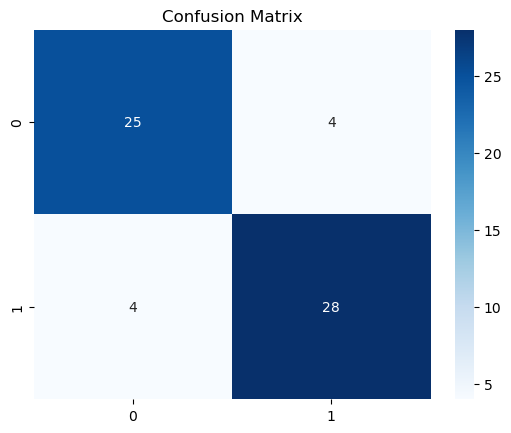

Random Forest:
Accuracy: 0.8524590163934426
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



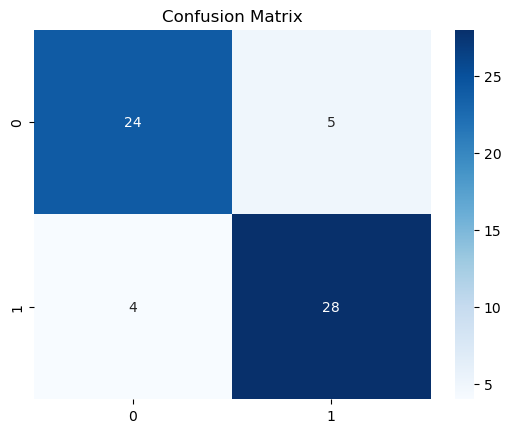

Support Vector Machine:
Accuracy: 0.9016393442622951
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



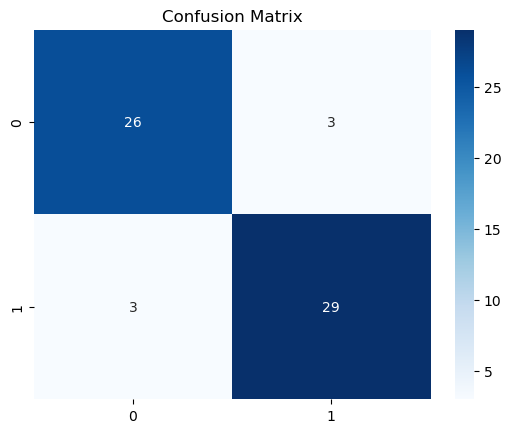

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

# Evaluate each model
print("Logistic Regression:")
evaluate_model(log_reg, X_test, y_test)

print("Random Forest:")
evaluate_model(rf, X_test, y_test)

print("Support Vector Machine:")
evaluate_model(svc, X_test, y_test)


As we clearly see, The Support Vector Machine model (SVM) shows the best performance across all metrics (accuracy, precision, recall, and F1 score), indicating it is the most effective at predicting heart disease in this dataset.

SVM model demonstrates excellent balance in its ability to correctly classify both classes, making it the best-performing model overall in terms of all evaluation metrics.

# 7. Visualizations and Conclusion

A ROC curve and feature importance plot 

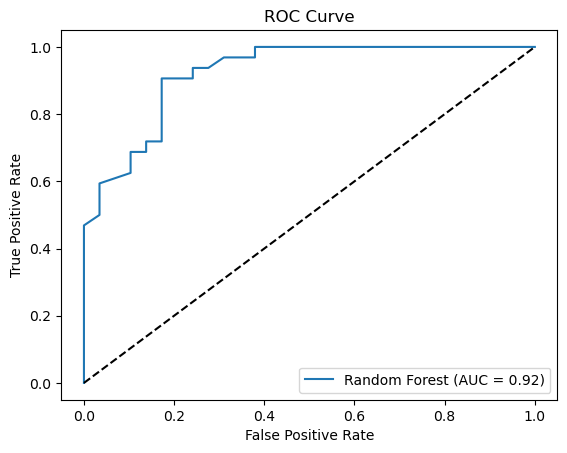

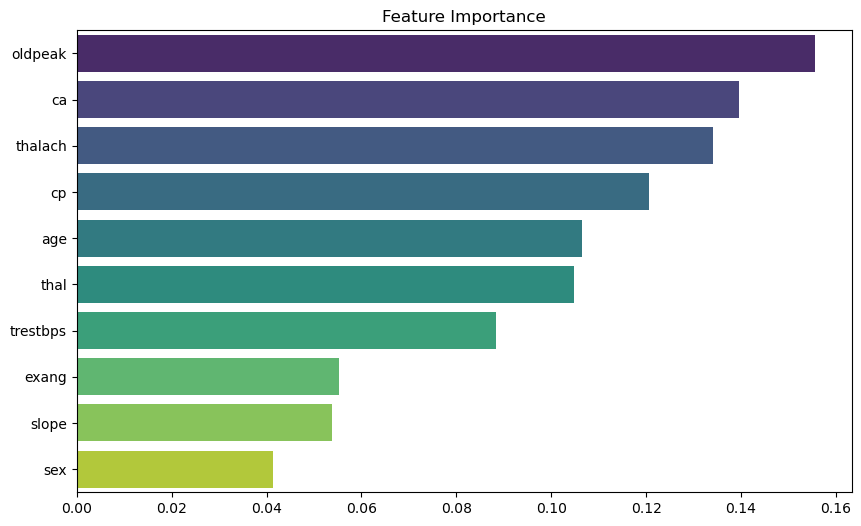

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve 
y_pred_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature importance plot for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = [top_features[i] for i in indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features, palette='viridis')
plt.title("Feature Importance")
plt.show()


AUC value=0.92 falls into the "excellent" range (AUC ≥ 0.8), indicating that the SVM model is performing well.It suggests that the model has a very high ability to correctly classify instances. Specifically, if someone randomly select one positive instance and one negative instance, there is a 92% chance that the model will rank the positive instance higher than the negative one.

A high AUC value gives you confidence that the model is reliably predicting outcomes. This can be particularly important in medical diagnoses where accurate classification is critical.




# Conclusion:

This project successfully demonstrated the application of machine learning techniques in predicting heart disease. The Support Vector Machine (SVM) model emerged as the best performer, achieving an impressive AUC score of 0.92, indicating its robust ability to distinguish between patients with and without heart disease.

Throughout the project, a comprehensive approach is used, beginning with data preprocessing and exploratory data analysis, which provided valuable insights into the key factors associated with heart disease. 

Looking ahead, future research could focus on improving the model's performance by integrating larger and more diverse datasets, exploring ensemble methods, and validating the model with real-world clinical data. 